# Non-invasive Phenotyping for Water and Nitrogen Uptake by Deep Roots Explored using Machine Learning


In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


# RadiMax Wheat 2018 and 2019

# Reading RLD data and isotope data of 2018 and 2019 experiments

In [2]:
import matplotlib.pyplot as plt  # For data visualization
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For advanced data visualization
import statsmodels.api as sm  # For statistical models and tests
from scipy import stats, interpolate, optimize  # For scientific computing and optimization
from sklearn.metrics import r2_score, mean_squared_error  # For evaluation metrics
import os  # For operating system related operations
import warnings  # For handling warnings
from scipy.optimize import curve_fit # from scipy  curve_fit



# Custom RadiMax libraries
from RadiMaxML import SpatialCorrection, ML_NCV  # For machine learning related tasks
from RadiMaxRootDepth import func_exp, FitSigmoid, sigmoid0  # For root depth modeling
from RadiMaxDataPreProcessing import RL_processing, fun_RL_computation, isotope_data_preprocess, plot_RL  # For data preprocessing and visualization


#warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)

# Reading rootpainter's data and isotope data of 2018 and 2019 experiments
data_May18_raw = pd.read_csv("./Data/RadiMax_Wheat_Root_Data_CLEAN_May18.csv")
data_June18_raw = pd.read_csv("./Data/RadiMax_Wheat_Root_Data_CLEAN_June18.csv")
data_July18_raw = pd.read_csv("./Data/RadiMax_Wheat_Root_Data_CLEAN_July18.csv")
isotope_data_18 = pd.read_excel("./Data/Radimax_isotope_2018.xlsx")

data_May19_raw = pd.read_csv("./Data/RadiMax_Wheat_Root_Data_CLEAN_May19.csv")
data_June19_raw = pd.read_csv("./Data/RadiMax_Wheat_Root_Data_CLEAN_June19.csv")
data_July19_raw = pd.read_csv("./Data/RadiMax_Wheat_Root_Data_CLEAN_July19.csv")
isotope_data_19 = pd.read_excel("./Data/Radimax_isotope_2019.xlsx")

# Importing RadiMax modules for RLD data pre-processing
# Pre-Processing 2018 and 2019 RLD data

In [3]:
# Processing 2018 RL data for getting root lengths from raw data
data_May18, data_June18, data_July18 = RL_processing(
    data_May18_raw.copy(),  # Copy of the raw May 2018 data
    data_June18_raw.copy(),  # Copy of the raw June 2018 data
    data_July18_raw.copy(),  # Copy of the raw July 2018 data
    Square_root=True,  # Flag to indicate square root transformation
    imageArea=20,  # Area of the image (in cm^2) for normalization
)

# Processing 2019 RL data for getting root lengths from raw data
data_May19, data_June19, data_July19 = RL_processing(
    data_May19_raw.copy(),  # Copy of the raw May 2019 data
    data_June19_raw.copy(),  # Copy of the raw June 2019 data
    data_July19_raw.copy(),  # Copy of the raw July 2019 data
    Square_root=True,  # Flag to indicate square root transformation
    imageArea=20,  # Area of the image (in cm^2) for normalization
)


In [4]:
n = 10  # Number of intervals for computation of RL in 2018

# Compute the range of soil depths for 2018 RL data
Soil_depth_range_18 = np.floor(
    np.linspace(
        start=np.max(
            [
                data_May18["soil_depth"].min(),  # Minimum soil depth in May 2018 data
                data_June18["soil_depth"].min(),  # Minimum soil depth in June 2018 data
                data_July18["soil_depth"].min(),  # Minimum soil depth in July 2018 data
            ]
        ),
        stop=np.min(
            [
                data_May18["soil_depth"].max(),  # Maximum soil depth in May 2018 data
                data_June18["soil_depth"].max(),  # Maximum soil depth in June 2018 data
                data_July18["soil_depth"].max(),  # Maximum soil depth in July 2018 data
            ]
        )
        + 1,  # Adding 1 to include the upper limit in the range
        num=n + 1,  # Number of intervals in the range (including both endpoints)
    )
)

# Convert the computed soil depth range to integer values
Soil_depth_range_18 = Soil_depth_range_18.astype(int)


In [5]:
Soil_depth_range_18 # soil depth range in 2018

array([119, 129, 140, 150, 160, 170, 180, 190, 200, 210, 220])

In [6]:
n = 10  # Number of intervals for computation of RL in 2019

# Compute the range of soil depths for 2019 RL data
Soil_depth_range_19 = np.floor(
    np.linspace(
        start=np.max(
            [
                data_May19["soil_depth"].min(),  # Minimum soil depth in May 2019 data
                data_June19["soil_depth"].min(),  # Minimum soil depth in June 2019 data
                data_July19["soil_depth"].min(),  # Minimum soil depth in July 2019 data
            ]
        ),
        stop=np.min(
            [
                data_May19["soil_depth"].max(),  # Maximum soil depth in May 2019 data
                data_June19["soil_depth"].max(),  # Maximum soil depth in June 2019 data
                data_July19["soil_depth"].max(),  # Maximum soil depth in July 2019 data
            ]
        )
        + 1,  # Adding 1 to include the upper limit in the range
        num=n + 1,  # Number of intervals in the range (including both endpoints)
    )
)

# Convert the computed soil depth range to integer values
Soil_depth_range_19 = Soil_depth_range_19.astype(int)


In [7]:
Soil_depth_range_19 # soil depth range in 2019

array([ 60,  78,  96, 114, 132, 150, 168, 186, 204, 222, 240])

# Computation Root Lengths at Different Soil Layers in  2018

In [8]:
# Computation of Root Lengths at Different Soil Layers in 2018 for May, June, and July
RL_May18, _ = fun_RL_computation(
    data_May18.copy(),  # Copy of the May 2018 data
    "RL_May_SD_",  # Prefix for the column names of computed root lengths for May 2018
    n,  # Number of intervals for computation
    Soil_depth_range_18  # Soil depth range for computation
)
RL_June18, _ = fun_RL_computation(
    data_June18.copy(),  # Copy of the June 2018 data
    "RL_June_SD_",  # Prefix for the column names of computed root lengths for June 2018
    n,  # Number of intervals for computation
    Soil_depth_range_18  # Soil depth range for computation
)
RL_July18, Intervals = fun_RL_computation(
    data_July18.copy(),  # Copy of the July 2018 data
    "RL_July_SD_",  # Prefix for the column names of computed root lengths for July 2018
    n,  # Number of intervals for computation
    Soil_depth_range_18  # Soil depth range for computation
)


# Computation Root Lengths at Different Soil Layers in 2019

In [9]:
# Computation of Root Lengths at Different Soil Layers in 2019 for May, June, and July
RL_May19, _ = fun_RL_computation(
    data_May19.copy(),  # Copy of the May 2019 data
    "RL_May_SD_",  # Prefix for the column names of computed root lengths for May 2019
    n,  # Number of intervals for computation
    Soil_depth_range_18  # Soil depth range for computation (common to both years)
)
RL_June19, _ = fun_RL_computation(
    data_June19.copy(),  # Copy of the June 2019 data
    "RL_June_SD_",  # Prefix for the column names of computed root lengths for June 2019
    n,  # Number of intervals for computation
    Soil_depth_range_18  # Soil depth range for computation (common to both years)
)
RL_July19, Intervals = fun_RL_computation(
    data_July19.copy(),  # Copy of the July 2019 data
    "RL_July_SD_",  # Prefix for the column names of computed root lengths for July 2019
    n,  # Number of intervals for computation
    Soil_depth_range_18  # Soil depth range for computation (common to both years)
)


In [10]:
# Merging of all average RL into a single DataFrame by Tube number
RL_Interval_18 = RL_May18.merge(RL_June18, on="row").merge(RL_July18, on="row")

In [11]:
# Merging of all average RL into a single DataFrame by Tube number
RL_Interval_19 = RL_May19.merge(RL_June19, on="row").merge(RL_July19, on="row")

In [12]:
# Preprocessing isotope data for Tube in 2018
isotope_data_tube18 = isotope_data_preprocess(isotope_data_18.copy(), 2018)

In [13]:
# Preprocessing isotope data for Tube in 2019, side="Both" as there were two measurements of isotopes in 2019, we took average
isotope_data_tube19 = isotope_data_preprocess(isotope_data_19.copy(), 2019, side="Both")

In [14]:
# Merging the computed RL with isotope data on the tube side of Bed 1 and Bed 2 for 2018
RL_Isotope_Interval_18 = pd.merge(RL_Interval_18, isotope_data_tube18, on="row")

# Dropping unnecessary columns from the merged DataFrame
RL_Isotope_Interval_18.drop(["row", "ID"], axis=1, inplace=True)

# Removing rows with missing values from the DataFrame
RL_Isotope_Interval_18.dropna(inplace=True)


In [15]:
# Merging the computed RL with isotope data on the tube side of Bed 1 and Bed 2 for 2019
RL_Isotope_Interval_19 = pd.merge(RL_Interval_19, isotope_data_tube19, on="row")

# Dropping unnecessary columns from the merged DataFrame
RL_Isotope_Interval_19.drop(["row", "ID"], axis=1, inplace=True)

# Removing rows with missing values from the DataFrame
RL_Isotope_Interval_19.dropna(inplace=True)


# Table 1 Summary of Sqrt_pRLD per minihizotron in the 2018 and 2019 dataset, for May, June, and July

In [16]:
# Summary of Sqrt_pRLD per minihizotron for May, June, and July
def funRLSummary(data_May, data_June, data_July, RL_Isotope):
    df_data = []
    
    # Iterate over RL_Isotope
    for i in RL_Isotope:
        # Compute sum of Root_length for each month
        RL_tube_May = data_May[data_May.tube == i]['Root_length'].sum()
        RL_tube_June = data_June[data_June.tube == i]['Root_length'].sum()
        RL_tube_July = data_July[data_July.tube == i]['Root_length'].sum()
        
        # Append the computed values to df_data
        df_data.append((RL_tube_May, RL_tube_June, RL_tube_July))
        
    # Create a DataFrame from df_data with appropriate column names
    df = pd.DataFrame(df_data, columns=["Sqrt_pRLD_May", "Sqrt_pRLD_June", "Sqrt_pRLD_July"])
    
    return df



In [17]:
# Obtain the list of valid tubes for 2018 by merging RL_Interval_18 with isotope_data_tube18 and extracting the 'row' column
Final_tubes_18 = pd.merge(RL_Interval_18, isotope_data_tube18, on="row")['row']

# Compute the summary statistics for Sqrt_pRLD for May, June, and July in 2018 using the funRLSummary function
summary_stats = funRLSummary(data_May18, data_June18, data_July18, Final_tubes_18).describe().loc[['mean', 'std', 'min', 'max']].round(0)

summary_stats 

,Sqrt_pRLD_May,Sqrt_pRLD_June,Sqrt_pRLD_July
mean,16.0,10.0,6.0
std,4.0,3.0,3.0
min,0.0,2.0,0.0
max,25.0,19.0,14.0


In [18]:
# Obtain the list of valid tubes for 2019 by merging RL_Interval_19 with isotope_data_tube19 and extracting the 'row' column
Final_tubes_19 = pd.merge(RL_Interval_19, isotope_data_tube19, on="row")['row']

# Compute the summary statistics for Sqrt_pRLD for May, June, and July in 2019 using the funRLSummary function
summary_stats_2019 = funRLSummary(data_May19, data_June19, data_July19, Final_tubes_19).describe().loc[['mean', 'std', 'min', 'max']].round(0)
summary_stats_2019 

,Sqrt_pRLD_May,Sqrt_pRLD_June,Sqrt_pRLD_July
mean,19.0,20.0,14.0
std,4.0,5.0,3.0
min,7.0,7.0,4.0
max,29.0,61.0,22.0


# Fig 1: The scatter diagram of log δ15N with regression line in one of the experimental units in 2018 is presented to illustrate the potential confounding effect.

Text(0, 0.5, ' log $\\delta 15N$')

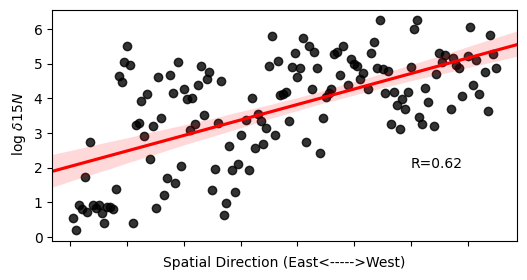

In [19]:
df = RL_Isotope_Interval_18 #  for 2018 Bed 1

# Create a subset of the DataFrame for Bed 1
dfb1 = df[df.bed == 1]  # Bed 1

# Create a figure with specified size
plt.figure(figsize=(6, 3))

# Perform linear regression and obtain regression statistics
slope, intercept, r_value, p_value, std_err = stats.linregress(dfb1["x"], dfb1["Log_Delta_15N"])

# Add text to the plot to display the correlation coefficient (R-value)
plt.text(1220, 2, "R=" + str(round(r_value, 2)), horizontalalignment="left", size="medium", color="black")

# Plot the regression line and scatter plot
handel = sns.regplot(
    x=dfb1["x"],
    y=dfb1["Log_Delta_15N"],
    color="red",
    truncate=False,
    scatter_kws={"color": "black"},
    line_kws={"color": "red"},
)

# Remove the tick labels on the x-axis
handel.set(xticklabels=[])

# Set the x-axis and y-axis labels
plt.xlabel("Spatial Direction (East<----->West)")
plt.ylabel(r" log $\delta 15N$")


# Fig. 2 :    Square root of planar root length density (Sqrt_pRLD) in a single tube across soil depth in June 2018

In [20]:
# Processing 2018 RL data for getting root lengths from pixel values, without square root transformation
data_May18, data_June18, data_July18 = RL_processing(
    data_May18_raw.copy(),
    data_June18_raw.copy(),
    data_July18_raw.copy(),
    Square_root=False,
    imageArea=20,
)

# Processing 2019 RL data for getting root lengths from pixel values, without square root transformation
data_May19, data_June19, data_July19 = RL_processing(
    data_May19_raw.copy(),
    data_June19_raw.copy(),
    data_July19_raw.copy(),
    Square_root=False,
    imageArea=20,
)


In [21]:
# Function to clean the dataset by dropping missing values [np.nan, np.inf, -np.inf]
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

# Selecting relevant columns for May 2018 RL data
data_May18_RL = data_May18.loc[:, ['tube', 'Root_length', 'soil_depth']]

# Selecting relevant columns for June 2018 RL data
data_June18_RL = data_June18.loc[:, ['tube', 'Root_length', 'soil_depth']]

# Selecting relevant columns for July 2018 RL data
data_July18_RL = data_July18.loc[:, ['tube', 'Root_length', 'soil_depth']]

# Cleaning the datasets by dropping missing values
data_May18_RL = clean_dataset(data_May18_RL)
data_June18_RL = clean_dataset(data_June18_RL)
data_July18_RL = clean_dataset(data_July18_RL)


Tube No: 2


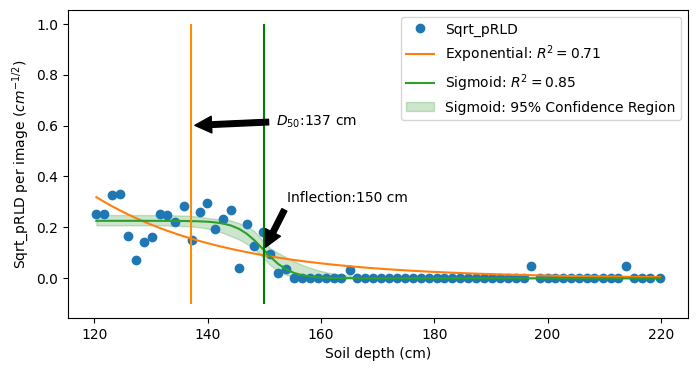

Estimated parameters:
a: 150 +/- 0.008946429279034676
b: -41.9617630872797 +/- 13.632298497283887
c: 0.2256753905553889 +/- 0.010652144291304068
tau: 0.2256753905553889 +/- 0.8930494481412418


In [22]:
# Specify month for display results of curve fitting
data = data_June18_RL.copy()
data.tube = data.tube.astype(int)

for i in [2]:
    # Select data for the specific tube number and sort it by soil depth
    temp1 = data[data.tube == i].sort_values(by='soil_depth')
    x = temp1['soil_depth']
    y = temp1['Root_length']
    x = (x - x.values[0]) / (x.values[-1] - x.values[0])  # Normalize the soil depth

    print(f'Tube No: {i}')

    # Fit an exponential function to the data
    popt, pcov = curve_fit(func_exp, x, np.sqrt(y), p0=[1, 0.1, .11], bounds=(0, (np.inf, np.inf, np.inf)), method='trf')
    a, tau, c = popt
    a_unc, tau_unc, c_unc = np.sqrt(np.diag(pcov))
    y_fit = func_exp(x, a, tau, c)
    y_pred = func_exp(x, *popt)
    SR1 = r2_score(np.sqrt(y), y_pred)

    # Calculate the half-life of the exponential decay function
    xph = np.log(2) / (tau)

    fig, ax = plt.subplots(figsize=(8, 4))

    xp_actual = int(round(xph * (temp1['soil_depth'].values[-1] - temp1['soil_depth'].values[0]) + temp1['soil_depth'].values[0], 0))
    a = round(a, 2)
    tau = round(tau, 2)
    ss = str(np.round(xp_actual, 1)) + " cm"
    xp_lav = round(x * (temp1['soil_depth'].values[-1] - temp1['soil_depth'].values[0]) + temp1['soil_depth'].values[0], 2)

    # Fit a sigmoid function to the data
    args, cov, SR2 = FitSigmoid(i, x, np.sqrt(y), zeroInfinity=True, soilMinDepth=temp1['soil_depth'].values[0],
                                soilMaxDepth=temp1['soil_depth'].values[-1], visual=False)
    x0_sig_inflec, b_sig, L = args
    x0_sig_inflec_unc, b_unc, L_unc = np.sqrt(np.diag(cov))
    y_pred = sigmoid0(x, *args)

    x0_sig_inflec_actual = int(round(x0_sig_inflec * (temp1['soil_depth'].values[-1] - temp1['soil_depth'].values[0]) + temp1['soil_depth'].values[0], 0))
    num_samples = 100
    samples = np.random.multivariate_normal([x0_sig_inflec, b_sig, L], cov, num_samples)
    y_samples = np.zeros((num_samples, len(xp_lav)))

    for i, sample in enumerate(samples):
        y_samples[i] = sigmoid0(x, *sample)

    # Plot the original data, the fitted curve, and the confidence region
    s = str(x0_sig_inflec_actual) + " cm"
    ax.plot(xp_lav, np.sqrt(y), 'o', xp_lav, y_fit, xp_lav, sigmoid0(x, *args), '-')
    plt.fill_between(xp_lav, np.percentile(y_samples, 2.5, axis=0),
                     np.percentile(y_samples, 97.5, axis=0), color='green', alpha=0.2)
    ax.set_prop_cycle(color=['red', 'green', 'blue'])

    ax.vlines(x=xp_actual, ymin=-0.1, ymax=int(y.max() + 1), color='darkorange')
    ax.annotate(r'$D_{50}$:' + ss, xy=(xp_actual, 0.6), xytext=(x0_sig_inflec_actual + 2, 0.6),
                arrowprops=dict(facecolor='black', shrink=0.05))

    ax.annotate('Inflection:' + s, xy=(x0_sig_inflec_actual, sigmoid0(x0_sig_inflec, x0_sig_inflec, b_sig, L)),
                xytext=(x0_sig_inflec_actual + 4, int(y.max() + 1) / 2 - .2),
                arrowprops=dict(facecolor='black', shrink=0.05))

    ax.vlines(x=x0_sig_inflec_actual, ymin=-0.1, ymax=int(y.max() + 1), color='green')
    ax.legend(['Sqrt_pRLD', r'Exponential: $R^{2}=$' + str(np.round(SR1, 2)),
               r'Sigmoid: $R^{2}=$' + str(np.round(SR2, 2)), 'Sigmoid: 95% Confidence Region'])

    ax.set_xlabel('Soil depth (cm)')
    ax.set_ylabel('Sqrt_pRLD per image ($cm^{-1/2}$)')
    plt.show()

    # Print the estimated parameters and their uncertainties
    print('Estimated parameters:')
    print('a:', x0_sig_inflec_actual, '+/-', x0_sig_inflec_unc)
    print('b:', b_sig, '+/-', b_unc)
    print('c:', L, '+/-', L_unc)
    print('tau:', L, '+/-', tau_unc)


# Figure 3: Average square root of planar root length density (Sqrt_pRLD) across all facility lines accumulated for 10 depth intervals 

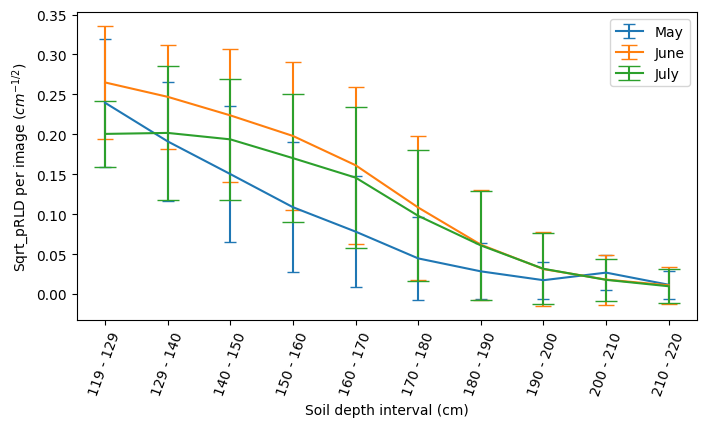

In [23]:
plot_RL(RL_May18, RL_June18, RL_July18, Intervals, n)  # Transformed data: Square root= True


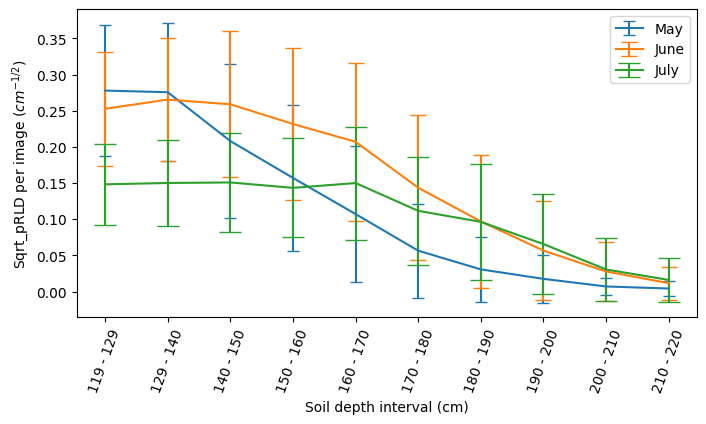

In [24]:
plot_RL(RL_May19, RL_June19, RL_July19, Intervals, n)  #  #  Transformed data: Square root= True

# Fig 5 Deep root functioning analysis using root depth estimated by SI and correlated against isotope measurements

In [25]:
# Read the Square_root_RL_Designed_feature_2018 CSV file into a DataFrame. This file was created after finding the sigmoid inflections SI and D50 
#for all tubes for all three months of 2018. It takes some time for comuputation for all tubes in 3 months.
DF_SR = pd.read_csv('./Data/Square_root_RL_Designed_feature_2018.csv', index_col='Unnamed: 0')

# Select specific columns from DF_SR for further processing
DF_SR1 = DF_SR.loc[:, ['May_Inflection_sig_point', 'June_Inflection_sig_point', 'July_Inflection_sig_point',
                       'x', 'bed', 'Delta_15N', 'Delta_13C', 'Log_Delta_15N']]

# Apply spatial correction on the selected columns using linear correction method
DF_SQ_spatial_corrected_L = SpatialCorrection(DF_SR1.copy(), 'L')  # L for Linear

# Update the Log_Delta_15N and Delta_13C columns in DF_SR with the corrected values
DF_SR['Log_Delta_15N'] = DF_SQ_spatial_corrected_L['Log_Delta_15N']
DF_SR['Delta_13C'] = DF_SQ_spatial_corrected_L['Delta_13C']



 Linear correction: Done


# Table 1 Summary of SI per minihizotron in the 2018 and 2019 dataset, for May, June, and July

In [26]:
DF_SR.loc[:,['May_Inflection_sig_point','June_Inflection_sig_point','July_Inflection_sig_point']].describe().loc[['mean','std','min','max']].round(0)

,May_Inflection_sig_point,June_Inflection_sig_point,July_Inflection_sig_point
mean,154.0,171.0,169.0
std,15.0,15.0,16.0
min,111.0,129.0,124.0
max,197.0,214.0,211.0


0.027160451225424063 -4.650762659506904 0.3082590087440933 2.0251861664546467e-07


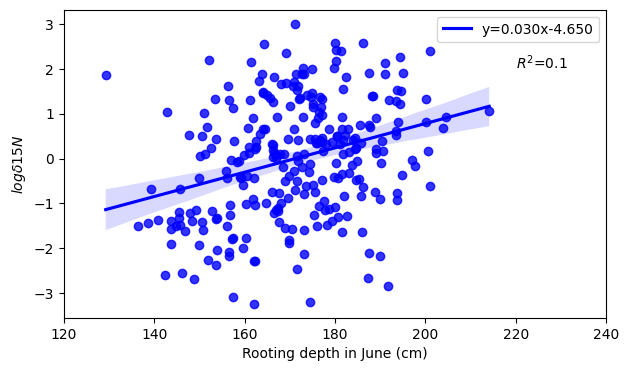

In [27]:
# Compute the linear regression between 'June_Inflection_sig_point' and 'Log_Delta_15N' columns
slope, intercept, r_value, p_value, std_err = stats.linregress(DF_SR['June_Inflection_sig_point'], DF_SR['Log_Delta_15N'])

# Print the slope, intercept, correlation coefficient (r-value), and p-value
print(slope, intercept, r_value, p_value)

# Create a figure with a specific size
plt.figure(figsize=(7, 4))

# Use the regplot function to plot the scatter plot and linear regression line
ax = sns.regplot(x="June_Inflection_sig_point", y="Log_Delta_15N", data=DF_SR, color='b', line_kws={'label': "y={0:.3f}x{1:.3f}".format(np.round(slope, 2), np.round(intercept, 2))})

# Set the x-axis label and y-axis label
ax.set(xlabel='Rooting depth in June (cm)', ylabel=r'$log \delta 15N$')

# Add a text annotation for the coefficient of determination (R^2)
plt.text(220, 2.0, "$R^2$=" + str(round(r_value**2, 2)), horizontalalignment='left', size='medium', color='black')

# Add a legend to the plot
ax.legend()

# Set the x-axis limits
plt.xlim((120, 240))

# Display the plot
plt.show()


In [28]:
# Fit a linear regression model using statsmodels
X = sm.add_constant(DF_SR['June_Inflection_sig_point'])
y = DF_SR["Log_Delta_15N"]
model = sm.OLS(y, X).fit()
# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Log_Delta_15N   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     28.46
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           2.03e-07
Time:                        19:16:02   Log-Likelihood:                -446.82
No. Observations:                 273   AIC:                             897.6
Df Residuals:                     271   BIC:                             904.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

-0.010824611882805446 1.8535296166612292 -0.2562431055839135 1.817704684227331e-05


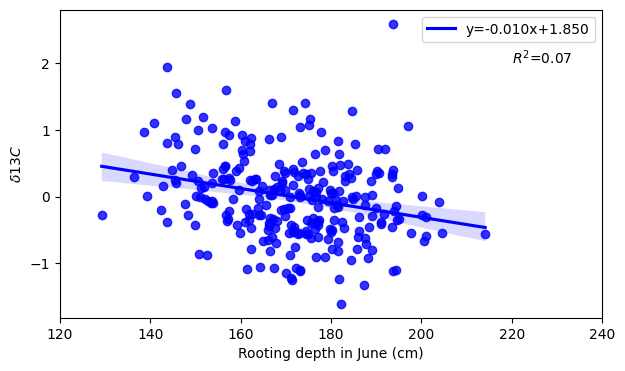

In [29]:
# Compute the linear regression between 'June_Inflection_sig_point' and 'Delta_13C' columns
slope, intercept, r_value, p_value, std_err = stats.linregress(DF_SR['June_Inflection_sig_point'], DF_SR['Delta_13C'])

# Print the slope, intercept, correlation coefficient (r-value), and p-value
print(slope, intercept, r_value, p_value)

# Create a figure with a specific size
plt.figure(figsize=(7, 4))

# Use the regplot function to plot the scatter plot and linear regression line
ax = sns.regplot(x="June_Inflection_sig_point", y="Delta_13C", data=DF_SR, color='b', line_kws={'label': "y={0:.3f}x+{1:.3f}".format(np.round(slope, 2), np.round(intercept, 2))})

# Set the x-axis label and y-axis label
ax.set(xlabel='Rooting depth in June (cm)', ylabel=r'$\delta 13C$')

# Add a text annotation for the coefficient of determination (R^2)
plt.text(220, 2.0, "$R^2$=" + str(round(r_value**2, 2)), horizontalalignment='left', size='medium', color='black')

# Add a legend to the plot
ax.legend()

# Set the x-axis limits
plt.xlim((120, 240))

# Display the plot
plt.show()


In [30]:
# Fit a linear regression model using statsmodels
X = sm.add_constant(DF_SR['June_Inflection_sig_point'])
y = DF_SR["Delta_13C"]
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Delta_13C   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     19.04
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           1.82e-05
Time:                        19:16:02   Log-Likelihood:                -250.49
No. Observations:                 273   AIC:                             505.0
Df Residuals:                     271   BIC:                             512.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [31]:
# Read the 'Square_root_RL_Designed_feature_2019.csv' file into a DataFrame, using 'Unnamed: 0' column as the index. This file was created after finding the sigmoid inflections SI and D50 
#for all tubes for all three months of 2018. It takes some time for comuputation for all tubes in 3 months.
DF_SR = pd.read_csv('./Data/Square_root_RL_Designed_feature_2019.csv', index_col='Unnamed: 0')

# Select the relevant columns from the DataFrame
DF_SR1 = DF_SR.loc[:, ['May_Inflection_sig_point', 'June_Inflection_sig_point', 'July_Inflection_sig_point', 'x', 'bed', 'Delta_15N', 'Delta_13C', 'Log_Delta_15N']]

# Apply spatial correction to the 'Log_Delta_15N' and 'Delta_13C' columns using linear correction
DF_SQ_spatial_corrected_L = SpatialCorrection(DF_SR1.copy(), 'L')  # 'L' for Linear correction

# Assign the corrected values back to the original DataFrame
DF_SR['Log_Delta_15N'] = DF_SQ_spatial_corrected_L['Log_Delta_15N']
DF_SR['Delta_13C'] = DF_SQ_spatial_corrected_L['Delta_13C']




 Linear correction: Done


In [32]:
DF_SR.loc[:,['May_Inflection_sig_point','June_Inflection_sig_point','July_Inflection_sig_point']].describe().loc[['mean','std','min','max']].round(0)

,May_Inflection_sig_point,June_Inflection_sig_point,July_Inflection_sig_point
mean,163.0,182.0,189.0
std,14.0,16.0,17.0
min,133.0,117.0,121.0
max,194.0,231.0,228.0


0.0073696094232391495 -1.3391291489334876 0.1469475823782677 0.03785585029503501


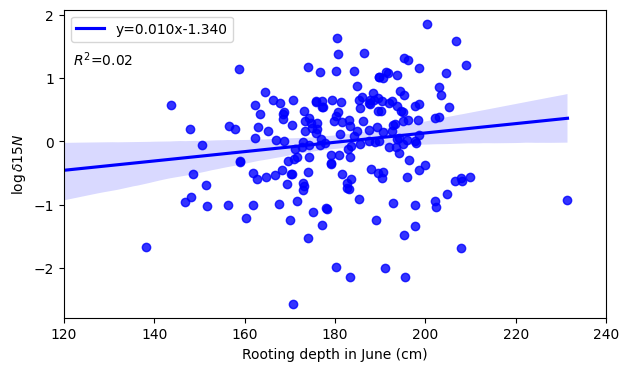

In [33]:
# Calculate the linear regression between 'June_Inflection_sig_point' and 'Log_Delta_15N' columns
slope, intercept, r_value, p_value, std_err = stats.linregress(DF_SR['June_Inflection_sig_point'], DF_SR['Log_Delta_15N'])

# Print the slope, intercept, r-value, and p-value
print(slope, intercept, r_value, p_value)

# Create a figure with a size of 7x4 inches
plt.figure(figsize=(7, 4))

# Use 'line_kws' to set line label for the legend
ax = sns.regplot(x="June_Inflection_sig_point", y="Log_Delta_15N", data=DF_SR, color='b', line_kws={'label': "y={0:.3f}x{1:.3f}".format(np.round(slope, 2), np.round(intercept, 2))})

# Set the x-label and y-label of the plot
ax.set(xlabel='Rooting depth in June (cm)', ylabel=r'$\log \delta 15N$')

# Add text annotation for the R-squared value
plt.text(122, 1.2, "$R^2$=" + str(round(r_value**2, 2)), horizontalalignment='left', size='medium', color='black')

# Display the legend
ax.legend()

# Set the x-axis limits
plt.xlim((120, 240))

# Display the plot
plt.show()


In [34]:

# Fit a linear regression model using statsmodels
X = sm.add_constant(DF_SR['June_Inflection_sig_point'])
y = DF_SR["Log_Delta_15N"]
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Log_Delta_15N   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     4.370
Date:                Sat, 24 Jun 2023   Prob (F-statistic):             0.0379
Time:                        19:16:02   Log-Likelihood:                -231.39
No. Observations:                 200   AIC:                             466.8
Df Residuals:                     198   BIC:                             473.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

0.0012131695463795597 -0.22044461366328838 0.051157552881233165 0.4718861789094224


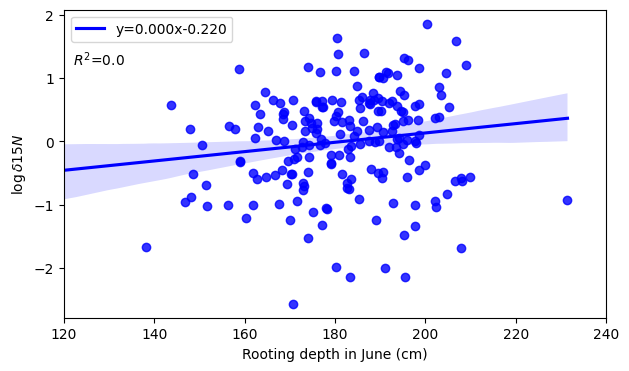

In [35]:
# Calculate the linear regression between 'June_Inflection_sig_point' and 'Delta_13C' columns
slope, intercept, r_value, p_value, std_err = stats.linregress(DF_SR['June_Inflection_sig_point'], DF_SR['Delta_13C'])

# Print the slope, intercept, r-value, and p-value
print(slope, intercept, r_value, p_value)

# Create a figure with a size of 7x4 inches
plt.figure(figsize=(7, 4))

# Use 'line_kws' to set line label for the legend
ax = sns.regplot(x="June_Inflection_sig_point", y="Log_Delta_15N", data=DF_SR, color='b', line_kws={'label': "y={0:.3f}x{1:.3f}".format(np.round(slope, 2), np.round(intercept, 2))})

# Set the x-label and y-label of the plot
ax.set(xlabel='Rooting depth in June (cm)', ylabel=r'$\log \delta 15N$')

# Add text annotation for the R-squared value
plt.text(122, 1.2, "$R^2$=" + str(round(r_value**2, 2)), horizontalalignment='left', size='medium', color='black')

# Display the legend
ax.legend()

# Set the x-axis limits
plt.xlim((120, 240))

# Display the plot
plt.show()


In [36]:
# Fit a linear regression model using statsmodels
X = sm.add_constant(DF_SR['June_Inflection_sig_point'])
y = DF_SR["Delta_13C"]
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Delta_13C   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5195
Date:                Sat, 24 Jun 2023   Prob (F-statistic):              0.472
Time:                        19:16:03   Log-Likelihood:                -83.523
No. Observations:                 200   AIC:                             171.0
Df Residuals:                     198   BIC:                             177.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

# Table 2 
# Modelling on 2018 Dataset
# 1. Spatial  Correction for enire dataframe RL_Isotope_Interval_18
# 2. Random Forest using five fold cross-validation

In [37]:
# Perform spatial correction on the entire dataframe RL_Isotope_Interval_18 using linear correction
DF_18_Raw_spatial_corrected_L = SpatialCorrection(RL_Isotope_Interval_18.copy(), "L")

# RL_Isotope_Interval_18 is the dataframe that contains the raw data
# "L" indicates that linear correction will be applied

# The resulting spatially corrected dataframe is stored in DF_18_Raw_spatial_corrected_L



 Linear correction: Done


In [38]:
import random

# Set a random seed
random.seed(123)

# Define the parameter grid for the Random Forest models
RF_models_param_grid = [
    {
        "max_depth": [5, 10, 15],  # Maximum depth of the trees in the Random Forest
        "n_estimators": [200, 300, 500, 1000],  # Number of trees in the Random Forest
        "max_features": [10, 20, None],  # Maximum number of features considered for splitting each node
    }
]

# Perform ML model training and cross-validation
# ML_NCV() is a function that takes the spatially corrected dataframe,
# the Random Forest parameter grid, and the model type ("RF" for Random Forest)
# It returns the test R-squared values, Features importance, p-value, and ML_df_Test_RMSE
LDF_Raw_Full_test_r, Fim_raw, pval, ML_df_TestRMSE = ML_NCV(
    DF_18_Raw_spatial_corrected_L.copy(), RF_models_param_grid, "RF"
)


 
Log_Delta_15N RF
Original correlation coefficient: 0.46
Standard deviation of correlation: 0.04
95% Confidence interval of correlation: [0.36716618 0.53572629]
Bias -0.00
Var_pred 0.37
Full test r 0.46
 
Delta_13C RF
Original correlation coefficient: 0.41
Standard deviation of correlation: 0.05
95% Confidence interval of correlation: [0.31956565 0.50042499]
Bias 0.00
Var_pred 0.07
Full test r 0.41


In [39]:
pval

,RF
Log_Delta_15N,4.870164e-16
Delta_13C,5.270970e-13


# Modelling on 2018 Dataset

# GB using five fold cross-validation

In [40]:
# Define the parameter grid for the GB models
GB_models_param_grid = [
    {  # corresponding to RandomForestRegressor
        "max_depth": [
            5,
            10,
            15,
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [200,300,500],
        "max_features": [10, 20, None],  # If None, then max_features=n_features.
    }
]

# Perform ML model training and cross-validation
# ML_NCV() is a function that takes the spatially corrected dataframe,
# the GB parameter grid, and the model type ("GB" for Gradient Boosting)
# It returns the test R-squared values, Features importance, p-value, and ML_df_TestRMSE
LDF_Raw_Full_test_r_GB, Fim_raw_GB, pval_GB, ML_df_TestRMSE_GB = ML_NCV(
    DF_18_Raw_spatial_corrected_L.copy(), GB_models_param_grid, "GB"
)


 
Log_Delta_15N GB
Original correlation coefficient: 0.42
Standard deviation of correlation: 0.04
95% Confidence interval of correlation: [0.33376449 0.5037245 ]
Bias -0.04
Var_pred 0.52
Full test r 0.42
 
Delta_13C GB
Original correlation coefficient: 0.39
Standard deviation of correlation: 0.05
95% Confidence interval of correlation: [0.29162138 0.48481792]
Bias -0.00
Var_pred 0.11
Full test r 0.39


In [41]:
pval_GB

,GB
Log_Delta_15N,7.601158e-14
Delta_13C,9.116676e-12


# Fig. 6 Random Forest feature importance for 15N uptake (left) and, 13C discrimination (right) in 2018. The feature importance of May, June, and July are plotted against at 10 different soil depth intervals between 119 - 220 cm to visualize the important depths for 15N uptake and 13C discrimination, respectively


In [42]:
col = DF_18_Raw_spatial_corrected_L.iloc[:, 0:-5].columns
col

Index(['RL_May_SD_(119, 129]', 'RL_May_SD_(129, 140]', 'RL_May_SD_(140, 150]',
       'RL_May_SD_(150, 160]', 'RL_May_SD_(160, 170]', 'RL_May_SD_(170, 180]',
       'RL_May_SD_(180, 190]', 'RL_May_SD_(190, 200]', 'RL_May_SD_(200, 210]',
       'RL_May_SD_(210, 220]', 'RL_June_SD_(119, 129]',
       'RL_June_SD_(129, 140]', 'RL_June_SD_(140, 150]',
       'RL_June_SD_(150, 160]', 'RL_June_SD_(160, 170]',
       'RL_June_SD_(170, 180]', 'RL_June_SD_(180, 190]',
       'RL_June_SD_(190, 200]', 'RL_June_SD_(200, 210]',
       'RL_June_SD_(210, 220]', 'RL_July_SD_(119, 129]',
       'RL_July_SD_(129, 140]', 'RL_July_SD_(140, 150]',
       'RL_July_SD_(150, 160]', 'RL_July_SD_(160, 170]',
       'RL_July_SD_(170, 180]', 'RL_July_SD_(180, 190]',
       'RL_July_SD_(190, 200]', 'RL_July_SD_(200, 210]',
       'RL_July_SD_(210, 220]'],
      dtype='object')

# Fig 6 Feature Importance of Root Distributions for predicting Isotope measurements

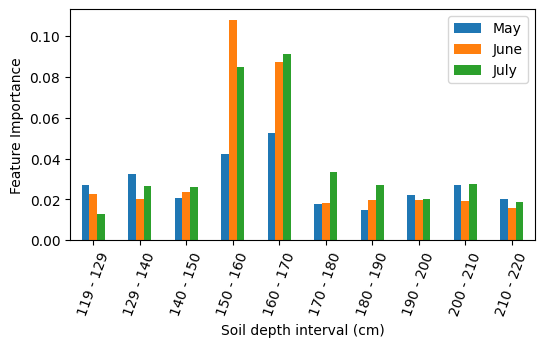

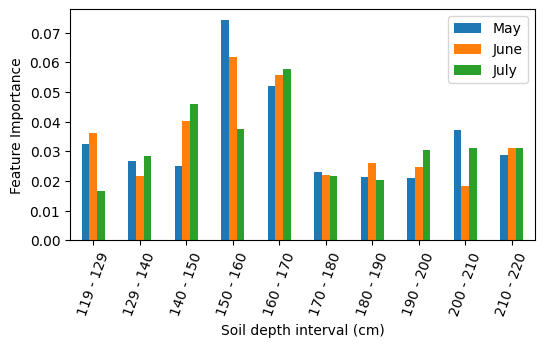

In [43]:
n = 10
feats = {}
T = ["Log_Delta_15N", "Delta_13C"]

# Iterate over the two columns of Fim_raw
for i in [0, 1]:
    # Create a dictionary to store feature importances
    feats = {}
    
    # Iterate over the columns and feature importances
    for feature, importance in zip(col, Fim_raw.iloc[:, i]):
        feats[feature] = importance
    
    # Create a DataFrame from the dictionary and sort it by feature importance
    importances = pd.DataFrame.from_dict(feats, orient="index").rename(columns={0: "reg_coeff"})
    importances = importances.sort_values(by="reg_coeff", ascending=False)
    importances = importances.reset_index()
    importances = importances.rename(columns={"index": "Features"})
    
    # Filter and sort feature importances for May, June, and July
    FeaImp_May = importances.iloc[np.where(importances.Features.str.contains("May"))[0], :].copy()
    FeaImp_June = importances.iloc[np.where(importances.Features.str.contains("June"))[0], :].copy()
    FeaImp_July = importances.iloc[np.where(importances.Features.str.contains("July"))[0], :].copy()
    FeaImp_May.sort_values(by="Features", inplace=True)
    FeaImp_June.sort_values(by="Features", inplace=True)
    FeaImp_July.sort_values(by="Features", inplace=True)
    
    # Define the index labels for each interval
    Intervals = [str(119) + " - " + str(129), str(129) + " - " + str(140), str(140) + " - " + str(150),
                 str(150) + " - " + str(160), str(160) + " - " + str(170), str(170) + " - " + str(180),
                 str(180) + " - " + str(190), str(190) + " - " + str(200), str(200) + " - " + str(210),
                 str(210) + " - " + str(220)]
    
    # Assign the index labels for each interval
    FeaImp_May.index = Intervals
    FeaImp_June.index = Intervals
    FeaImp_July.index = Intervals
    
    # Plot the bar chart for May, June, and July feature importances
    dfff = pd.DataFrame(
        {
            "May": FeaImp_May.reg_coeff,
            "June": FeaImp_June.reg_coeff,
            "July": FeaImp_July.reg_coeff,
        }
    )
    dfff[["May", "June", "July"]].plot(kind="bar", figsize=(6, 3))
    plt.xticks(rotation=70, size=10)
    plt.yticks(size=10)
    plt.grid(False)
    plt.legend(fontsize=10)
    plt.ylabel("Feature Importance", size=10)
    plt.xlabel("Soil depth interval (cm)")

# Modelling on 2019 Dataset

#  2019 Dataset:   Random Forest and  Gradient Boosting using five fold cross-validation using nested cross-validation
# Table 2  

In [44]:
DF_19_Raw_spatial_corrected_L = SpatialCorrection(
    RL_Isotope_Interval_19.copy(), "L"
)  # L for Linear


RF_models_param_grid = [
    {  # corresponding to RandomForestRegressor
        "max_depth": [
            5,
            10,
            15,
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [200,300,500,1000],
        "max_features": [10, 20, None],  # If None, then max_features=n_features.
    }
]


LDF_Raw_Full_test_r, Fim_raw, pval, ML_df_TestRMSE= ML_NCV(
    DF_19_Raw_spatial_corrected_L.copy(), RF_models_param_grid, "RF"
)


 Linear correction: Done
 
Log_Delta_15N RF
Original correlation coefficient: 0.1
Standard deviation of correlation: 0.06
95% Confidence interval of correlation: [-0.01474613  0.23585939]
Bias -0.04
Var_pred 0.06
Full test r 0.10
 
Delta_13C RF
Original correlation coefficient: 0.06
Standard deviation of correlation: 0.07
95% Confidence interval of correlation: [-0.07952901  0.1858661 ]
Bias 0.01
Var_pred 0.01
Full test r 0.06


In [45]:
pval

,RF
Log_Delta_15N,0.135762
Delta_13C,0.423605


In [46]:
import pandas as pd
from RadiMaxML import ML_NCV   #ML_NCV is our RAdiMax ML module

DF_18_Raw_spatial_corrected_L = pd.read_csv(
    "DF_18_Raw_spatial_corrected_L.csv", index_col="Unnamed: 0"
)



GB_models_param_grid = [
    {  # corresponding to 
        "max_depth": [
            5,
            10,
            15,
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [200,300,500,1000],
        "max_features": [10, 20, None],  # If None, then max_features=n_features.
    }
]


LDF_Raw_Full_test_r_GB, Fim_raw_GB, pval_GB, ML_df_TestRMSE_GB= ML_NCV(
    DF_19_Raw_spatial_corrected_L.copy(), GB_models_param_grid, "GB"
)

 
Log_Delta_15N GB
Original correlation coefficient: -0.01
Standard deviation of correlation: 0.07
95% Confidence interval of correlation: [-0.14062081  0.12982127]
Bias -0.06
Var_pred 0.15
Full test r -0.01
 
Delta_13C GB
Original correlation coefficient: 0.1
Standard deviation of correlation: 0.06
95% Confidence interval of correlation: [-0.03022223  0.22773578]
Bias 0.00
Var_pred 0.02
Full test r 0.10


In [47]:
pval_GB

,GB
Log_Delta_15N,0.858862
Delta_13C,0.144629


# Rooting depth correlation: Table 2

In [48]:
# Read the Rooting depth data of all selected tubes 
SI_18_Raw=pd.read_csv('./Data/Square_root_RL_Designed_feature_2018.csv',index_col='Unnamed: 0')
SI_19_Raw=pd.read_csv('./Data/Square_root_RL_Designed_feature_2019.csv',index_col='Unnamed: 0')

In [49]:
SI_18_Raw.drop('ID',axis=1,inplace=True)

SI_18_Raw_spatial_corrected_Done = SpatialCorrection(SI_18_Raw.copy(), "L"
)  


 Linear correction: Done


In [50]:
# Selection of specific columns
SI_18_Raw_spatial_corrected_Done=SI_18_Raw_spatial_corrected_Done.loc[:,['May_half_life','June_half_life','July_half_life','May_Inflection_sig_point','June_Inflection_sig_point','July_Inflection_sig_point','Log_Delta_15N','Delta_13C']]

# Table 2:   correlation and uncertainty analysis

In [51]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

def compute_correlation_matrix(data, num_iterations=1000):
    num_columns = len(data.columns)
    corr_matrix = data.corr()
    bootstrap_corrs = np.zeros((num_columns, num_columns, num_iterations))

    for i in range(num_iterations):
        bootstrap_sample = data.sample(n=len(data), replace=True)
        bootstrap_corr_matrix = bootstrap_sample.corr().values
        bootstrap_corrs[:, :, i] = bootstrap_corr_matrix

    std_devs = np.std(bootstrap_corrs, axis=2)
    confidence_intervals = np.percentile(bootstrap_corrs, [2.5, 97.5], axis=2)

    return corr_matrix, std_devs, confidence_intervals


In [52]:

data = SI_18_Raw_spatial_corrected_Done

corr_matrix, std_devs, confidence_intervals = compute_correlation_matrix(data)

# Convert correlation matrix, std_devs, and confidence_intervals to DataFrames
corr_matrix_df = pd.DataFrame(corr_matrix, columns=data.columns, index=data.columns)
std_devs_df = pd.DataFrame(std_devs, columns=data.columns, index=data.columns)

confidence_intervals_df = pd.DataFrame(index=data.columns, columns=data.columns)
for col in data.columns:
    lower_ci = confidence_intervals[0, :, data.columns.get_loc(col)].round(2)
    upper_ci = confidence_intervals[1, :, data.columns.get_loc(col)].round(2)
    confidence_intervals_df[col] = [f'({a}, {b})' for a, b in zip(lower_ci, upper_ci)]


In [53]:
# Standard Deviation
std_devs_df.round(2)

,May_half_life,June_half_life,July_half_life,May_Inflection_sig_point,June_Inflection_sig_point,July_Inflection_sig_point,Log_Delta_15N,Delta_13C
May_half_life,0.00,0.05,0.05,0.03,0.04,0.04,0.05,0.06
June_half_life,0.05,0.00,0.04,0.04,0.03,0.04,0.05,0.05
July_half_life,0.05,0.04,0.00,0.05,0.03,0.03,0.04,0.05
May_Inflection_sig_point,0.03,0.04,0.05,0.00,0.03,0.03,0.05,0.05
June_Inflection_sig_point,0.04,0.03,0.03,0.03,0.00,0.01,0.06,0.05
July_Inflection_sig_point,0.04,0.04,0.03,0.03,0.01,0.00,0.05,0.04
Log_Delta_15N,0.05,0.05,0.04,0.05,0.06,0.05,0.00,0.06
Delta_13C,0.06,0.05,0.05,0.05,0.05,0.04,0.06,0.00


In [54]:
# Correlation coefficients
corr_matrix_df.round(2)

,May_half_life,June_half_life,July_half_life,May_Inflection_sig_point,June_Inflection_sig_point,July_Inflection_sig_point,Log_Delta_15N,Delta_13C
May_half_life,1.00,0.48,0.44,0.79,0.59,0.59,0.26,-0.17
June_half_life,0.48,1.00,0.73,0.57,0.76,0.68,0.32,-0.21
July_half_life,0.44,0.73,1.00,0.49,0.69,0.70,0.31,-0.19
May_Inflection_sig_point,0.79,0.57,0.49,1.00,0.73,0.73,0.34,-0.27
June_Inflection_sig_point,0.59,0.76,0.69,0.73,1.00,0.91,0.37,-0.30
July_Inflection_sig_point,0.59,0.68,0.70,0.73,0.91,1.00,0.39,-0.31
Log_Delta_15N,0.26,0.32,0.31,0.34,0.37,0.39,1.00,-0.32
Delta_13C,-0.17,-0.21,-0.19,-0.27,-0.30,-0.31,-0.32,1.00


In [55]:
# 95 % confidence_intervals 
confidence_intervals_df

,May_half_life,June_half_life,July_half_life,May_Inflection_sig_point,June_Inflection_sig_point,July_Inflection_sig_point,Log_Delta_15N,Delta_13C
May_half_life,"(1.0, 1.0)","(0.37, 0.58)","(0.34, 0.54)","(0.74, 0.84)","(0.52, 0.66)","(0.52, 0.67)","(0.16, 0.36)","(-0.28, -0.06)"
June_half_life,"(0.37, 0.58)","(1.0, 1.0)","(0.66, 0.81)","(0.49, 0.65)","(0.7, 0.81)","(0.61, 0.76)","(0.22, 0.41)","(-0.3, -0.13)"
July_half_life,"(0.34, 0.54)","(0.66, 0.81)","(1.0, 1.0)","(0.39, 0.59)","(0.63, 0.75)","(0.63, 0.76)","(0.22, 0.39)","(-0.28, -0.09)"
May_Inflection_sig_point,"(0.74, 0.84)","(0.49, 0.65)","(0.39, 0.59)","(1.0, 1.0)","(0.67, 0.78)","(0.67, 0.78)","(0.23, 0.43)","(-0.37, -0.17)"
June_Inflection_sig_point,"(0.52, 0.66)","(0.7, 0.81)","(0.63, 0.75)","(0.67, 0.78)","(1.0, 1.0)","(0.89, 0.93)","(0.25, 0.47)","(-0.4, -0.2)"
July_Inflection_sig_point,"(0.52, 0.67)","(0.61, 0.76)","(0.63, 0.76)","(0.67, 0.78)","(0.89, 0.93)","(1.0, 1.0)","(0.28, 0.49)","(-0.4, -0.23)"
Log_Delta_15N,"(0.16, 0.36)","(0.22, 0.41)","(0.22, 0.39)","(0.23, 0.43)","(0.25, 0.47)","(0.28, 0.49)","(1.0, 1.0)","(-0.45, -0.2)"
Delta_13C,"(-0.28, -0.06)","(-0.3, -0.13)","(-0.28, -0.09)","(-0.37, -0.17)","(-0.4, -0.2)","(-0.4, -0.23)","(-0.45, -0.2)","(1.0, 1.0)"


In [56]:
# Calculate the correlation matrix
rho = SI_18_Raw_spatial_corrected_Done.corr()

# Calculate the p-values for the correlation matrix
pval = SI_18_Raw_spatial_corrected_Done.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)

# Generate the p-value symbols (* symbols indicating significance levels)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x <= t]))

# Round the correlation matrix to two decimal places and convert to string
# Append the standard deviations dataframe (std_devs_df) rounded to two decimal places
# Append the p-value symbols to the correlation matrix
result = rho.round(2).astype(str) + ' ± ' + std_devs_df.round(2).astype(str) + p
result 

,May_half_life,June_half_life,July_half_life,May_Inflection_sig_point,June_Inflection_sig_point,July_Inflection_sig_point,Log_Delta_15N,Delta_13C
May_half_life,1.0 ± 0.0***,0.48 ± 0.05***,0.44 ± 0.05***,0.79 ± 0.03***,0.59 ± 0.04***,0.59 ± 0.04***,0.26 ± 0.05***,-0.17 ± 0.06**
June_half_life,0.48 ± 0.05***,1.0 ± 0.0***,0.73 ± 0.04***,0.57 ± 0.04***,0.76 ± 0.03***,0.68 ± 0.04***,0.32 ± 0.05***,-0.21 ± 0.05***
July_half_life,0.44 ± 0.05***,0.73 ± 0.04***,1.0 ± 0.0***,0.49 ± 0.05***,0.69 ± 0.03***,0.7 ± 0.03***,0.31 ± 0.04***,-0.19 ± 0.05**
May_Inflection_sig_point,0.79 ± 0.03***,0.57 ± 0.04***,0.49 ± 0.05***,1.0 ± 0.0***,0.73 ± 0.03***,0.73 ± 0.03***,0.34 ± 0.05***,-0.27 ± 0.05***
June_Inflection_sig_point,0.59 ± 0.04***,0.76 ± 0.03***,0.69 ± 0.03***,0.73 ± 0.03***,1.0 ± 0.0***,0.91 ± 0.01***,0.37 ± 0.06***,-0.3 ± 0.05***
July_Inflection_sig_point,0.59 ± 0.04***,0.68 ± 0.04***,0.7 ± 0.03***,0.73 ± 0.03***,0.91 ± 0.01***,1.0 ± 0.0***,0.39 ± 0.05***,-0.31 ± 0.04***
Log_Delta_15N,0.26 ± 0.05***,0.32 ± 0.05***,0.31 ± 0.04***,0.34 ± 0.05***,0.37 ± 0.06***,0.39 ± 0.05***,1.0 ± 0.0***,-0.32 ± 0.06***
Delta_13C,-0.17 ± 0.06**,-0.21 ± 0.05***,-0.19 ± 0.05**,-0.27 ± 0.05***,-0.3 ± 0.05***,-0.31 ± 0.04***,-0.32 ± 0.06***,1.0 ± 0.0***


# 2019

In [57]:
SI_19_Raw.drop('ID',axis=1,inplace=True)

SI_19_Raw_spatial_corrected_Done = SpatialCorrection(
    SI_19_Raw.copy(), "L"
)  


 Linear correction: Done


In [58]:
SI_19_Raw_spatial_corrected_Done=SI_19_Raw_spatial_corrected_Done.loc[:,['May_half_life','June_half_life','July_half_life','May_Inflection_sig_point','June_Inflection_sig_point','July_Inflection_sig_point','Log_Delta_15N','Delta_13C']]

In [59]:

data =SI_19_Raw_spatial_corrected_Done

corr_matrix, std_devs, confidence_intervals = compute_correlation_matrix(data)

# Convert correlation matrix, std_devs, and confidence_intervals to DataFrames
corr_matrix_df = pd.DataFrame(corr_matrix, columns=data.columns, index=data.columns)
std_devs_df = pd.DataFrame(std_devs, columns=data.columns, index=data.columns)

confidence_intervals_df = pd.DataFrame(index=data.columns, columns=data.columns)
for col in data.columns:
    lower_ci = confidence_intervals[0, :, data.columns.get_loc(col)].round(2)
    upper_ci = confidence_intervals[1, :, data.columns.get_loc(col)].round(2)
    confidence_intervals_df[col] = [f'({a}, {b})' for a, b in zip(lower_ci, upper_ci)]



In [60]:
corr_matrix_df.round(2)

,May_half_life,June_half_life,July_half_life,May_Inflection_sig_point,June_Inflection_sig_point,July_Inflection_sig_point,Log_Delta_15N,Delta_13C
May_half_life,1.00,0.58,0.50,0.69,0.39,0.42,0.17,-0.01
June_half_life,0.58,1.00,0.59,0.41,0.64,0.44,0.17,0.13
July_half_life,0.50,0.59,1.00,0.38,0.46,0.55,0.18,0.08
May_Inflection_sig_point,0.69,0.41,0.38,1.00,0.54,0.49,0.15,-0.02
June_Inflection_sig_point,0.39,0.64,0.46,0.54,1.00,0.71,0.17,0.06
July_Inflection_sig_point,0.42,0.44,0.55,0.49,0.71,1.00,0.24,0.12
Log_Delta_15N,0.17,0.17,0.18,0.15,0.17,0.24,1.00,0.01
Delta_13C,-0.01,0.13,0.08,-0.02,0.06,0.12,0.01,1.00


In [61]:
std_devs_df.round(2)

,May_half_life,June_half_life,July_half_life,May_Inflection_sig_point,June_Inflection_sig_point,July_Inflection_sig_point,Log_Delta_15N,Delta_13C
May_half_life,0.00,0.05,0.06,0.04,0.06,0.06,0.07,0.08
June_half_life,0.05,0.00,0.05,0.06,0.05,0.05,0.08,0.06
July_half_life,0.06,0.05,0.00,0.06,0.06,0.05,0.07,0.06
May_Inflection_sig_point,0.04,0.06,0.06,0.00,0.04,0.05,0.07,0.07
June_Inflection_sig_point,0.06,0.05,0.06,0.04,0.00,0.05,0.07,0.07
July_Inflection_sig_point,0.06,0.05,0.05,0.05,0.05,0.00,0.07,0.06
Log_Delta_15N,0.07,0.08,0.07,0.07,0.07,0.07,0.00,0.08
Delta_13C,0.08,0.06,0.06,0.07,0.07,0.06,0.08,0.00


In [62]:
confidence_intervals_df

,May_half_life,June_half_life,July_half_life,May_Inflection_sig_point,June_Inflection_sig_point,July_Inflection_sig_point,Log_Delta_15N,Delta_13C
May_half_life,"(1.0, 1.0)","(0.47, 0.68)","(0.39, 0.61)","(0.61, 0.77)","(0.28, 0.51)","(0.3, 0.54)","(0.04, 0.31)","(-0.16, 0.15)"
June_half_life,"(0.47, 0.68)","(1.0, 1.0)","(0.49, 0.68)","(0.29, 0.52)","(0.53, 0.73)","(0.34, 0.54)","(0.01, 0.32)","(0.02, 0.24)"
July_half_life,"(0.39, 0.61)","(0.49, 0.68)","(1.0, 1.0)","(0.25, 0.5)","(0.34, 0.57)","(0.44, 0.65)","(0.05, 0.32)","(-0.05, 0.2)"
May_Inflection_sig_point,"(0.61, 0.77)","(0.29, 0.52)","(0.25, 0.5)","(1.0, 1.0)","(0.45, 0.62)","(0.37, 0.58)","(0.02, 0.29)","(-0.16, 0.13)"
June_Inflection_sig_point,"(0.28, 0.51)","(0.53, 0.73)","(0.34, 0.57)","(0.45, 0.62)","(1.0, 1.0)","(0.62, 0.82)","(0.04, 0.33)","(-0.07, 0.19)"
July_Inflection_sig_point,"(0.3, 0.54)","(0.34, 0.54)","(0.44, 0.65)","(0.37, 0.58)","(0.62, 0.82)","(1.0, 1.0)","(0.11, 0.38)","(0.0, 0.24)"
Log_Delta_15N,"(0.04, 0.31)","(0.01, 0.32)","(0.05, 0.32)","(0.02, 0.29)","(0.04, 0.33)","(0.11, 0.38)","(1.0, 1.0)","(-0.14, 0.16)"
Delta_13C,"(-0.16, 0.15)","(0.02, 0.24)","(-0.05, 0.2)","(-0.16, 0.13)","(-0.07, 0.19)","(0.0, 0.24)","(-0.14, 0.16)","(1.0, 1.0)"


In [63]:
from scipy.stats import pearsonr
import numpy as np

# Calculate the correlation matrix
rho = SI_19_Raw_spatial_corrected_Done.corr()

# Calculate the p-values for the correlation matrix
pval = SI_19_Raw_spatial_corrected_Done.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)

# Generate the p-value symbols (* symbols indicating significance levels)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x <= t]))

# Round the correlation matrix to two decimal places and convert to string
# Append the standard deviations dataframe (std_devs_df) rounded to two decimal places
# Append the p-value symbols to the correlation matrix
result = rho.round(2).astype(str) + ' ± ' + std_devs_df.round(2).astype(str) + p
result

,May_half_life,June_half_life,July_half_life,May_Inflection_sig_point,June_Inflection_sig_point,July_Inflection_sig_point,Log_Delta_15N,Delta_13C
May_half_life,1.0 ± 0.0***,0.58 ± 0.05***,0.5 ± 0.06***,0.69 ± 0.04***,0.39 ± 0.06***,0.42 ± 0.06***,0.17 ± 0.07*,-0.01 ± 0.08
June_half_life,0.58 ± 0.05***,1.0 ± 0.0***,0.59 ± 0.05***,0.41 ± 0.06***,0.64 ± 0.05***,0.44 ± 0.05***,0.17 ± 0.08*,0.13 ± 0.06
July_half_life,0.5 ± 0.06***,0.59 ± 0.05***,1.0 ± 0.0***,0.38 ± 0.06***,0.46 ± 0.06***,0.55 ± 0.05***,0.18 ± 0.07**,0.08 ± 0.06
May_Inflection_sig_point,0.69 ± 0.04***,0.41 ± 0.06***,0.38 ± 0.06***,1.0 ± 0.0***,0.54 ± 0.04***,0.49 ± 0.05***,0.15 ± 0.07*,-0.02 ± 0.07
June_Inflection_sig_point,0.39 ± 0.06***,0.64 ± 0.05***,0.46 ± 0.06***,0.54 ± 0.04***,1.0 ± 0.0***,0.71 ± 0.05***,0.17 ± 0.07*,0.06 ± 0.07
July_Inflection_sig_point,0.42 ± 0.06***,0.44 ± 0.05***,0.55 ± 0.05***,0.49 ± 0.05***,0.71 ± 0.05***,1.0 ± 0.0***,0.24 ± 0.07***,0.12 ± 0.06
Log_Delta_15N,0.17 ± 0.07*,0.17 ± 0.08*,0.18 ± 0.07**,0.15 ± 0.07*,0.17 ± 0.07*,0.24 ± 0.07***,1.0 ± 0.0***,0.01 ± 0.08
Delta_13C,-0.01 ± 0.08,0.13 ± 0.06,0.08 ± 0.06,-0.02 ± 0.07,0.06 ± 0.07,0.12 ± 0.06,0.01 ± 0.08,1.0 ± 0.0***
